In [3]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/bassetbat/MCM-problem-C-data/master/hair_dryer%20-%20UTF.txt'
micro = pd.read_table(url, sep = '\t')

reviews = {}
i = -1
for j in micro['review_body']:
    i= i+1
    reviews[i] = j
    if i > 2000:
        break


In [4]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    list_of_text = str(list_of_text)
    combined_text = ''.join(list_of_text)
    return combined_text

In [5]:
data_combined = {key: [combine_text(value)] for (key, value) in reviews.items()}
print (data_combined)

{0: ['Works great!'], 1: ["This dries my hair faster that bigger, more powerful models. I love travel blow dryers because they are easy to lift and they usually come in 1600 w or less. Bigger dryers are heavy and blow my hair everywhere. This has a surprising amount of power and is very compact. I would give it a five except that the switch is not easy to turn on and off with one hand and it's noisier than I anticipated."], 2: ['Love this dryer!'], 3: ['styling hair in style'], 4: ["I just got this last week. I think's great. The cord length is perfect."], 5: ['Excellent dryer.'], 6: ['Gets extremely hot - I have burned my hand on both the metal grate as well as the plastic body. After use I have to keep on the counter because it is too hot to put away. It has melted 2 different combs and now starts to smoke during use. My hair requires high heat to dry completely and not be frizzy, but this is unsafe and ridiculous. As soon as my new model arrives (not this brand) this is going in the

In [6]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['reviews']
data_df = data_df.sort_index()
data_df

,reviews
0,Works great!
1,"This dries my hair faster that bigger, more powerful models. I love travel blow dryers because they are easy to lift and they usually come in 1600..."
2,Love this dryer!
3,styling hair in style
4,I just got this last week. I think's great. The cord length is perfect.
...,...
1997,this has met all my expectations. very happy with product
1998,She loves it. It performs better than expected. Congrats on selling a GREAT product and thanks for asking.
1999,"First Amazon Review... So I bought this hair dryer as my main hairdryer at home. I typically use the WARM setting. Overall, great finish and works..."
2000,"My Revlon hair dryer started sparking and died in January, a few days after the one-year warranty expired (yay! not.) so I needed to find a quick ..."


In [7]:
data_df.reviews.loc[3]

'styling hair in style'

In [43]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('baby', '', text)
    text = re.sub('br', '', text)
    text = re.sub('just', '', text)
    text = re.sub('like', '', text)
    text = re.sub('good', '', text)
    text = re.sub('use', '', text)
    text = re.sub('used', '', text)
    text = re.sub('ge', '', text)
    text = re.sub('samsung', '', text)
    text = re.sub('unit', '', text)
    text = re.sub('product', '', text)
    text = re.sub('does', '', text)
    text = re.sub('pacifier', '', text)
    text = re.sub('pacifiers', '', text)
    text = re.sub('got', '', text)
    text = re.sub('love', '', text)
    text = re.sub('loves', '', text)
    text = re.sub('great', '', text)
    text = re.sub('ok', '', text)
    text = re.sub('beca', '', text)
    text = re.sub('easy', '', text)
    text = re.sub('easily', '', text)
    text = re.sub('hair', '', text)
    text = re.sub('dryer', '', text)
    text = re.sub('im', '', text)
    text = re.sub('really', '', text)
    text = re.sub('te', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [44]:
data_clean = pd.DataFrame(data_df.reviews.apply(round1))
data_clean

,reviews
0,works
1,this dries my fasr that bigr more powerful models i travel blow s they are to lift and they usually come in w or less bigr s are heavy and bl...
2,this
3,styling in style
4,i this last week i thinks the cord length is perfect
...,...
1997,this has met all my expectations very happy with
1998,she s it it performs betr than expecd congrats on selling a and thanks for asking
1999,first amazon review so i bought this as my main at home i typically the warm setting overall finish and works very well despi me using the wa...
2000,my revlon stard sparking and died in january a few days afr the oneyear warranty expired yay not so i needed to find a quick replacement ive bee...


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.reviews)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abandoned,abd,ability,able,absolu,absoluly,absorb,abundant,ac,accent,...,yrs,zea,zero,çª,çô,çös,ƒæìƒå,ƒÿè,ƒÿë,ƒÿì
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['reviews'].apply(pol)
data_clean['subjectivity'] = data_clean['reviews'].apply(sub)
data_clean

,reviews,polarity,subjectivity
0,works,0.000000,0.000000
1,this dries my fasr that bigr more powerful models i travel blow s they are to lift and they usually come in w or less bigr s are heavy and bl...,0.154762,0.445238
2,this,0.000000,0.000000
3,styling in style,0.000000,0.000000
4,i this last week i thinks the cord length is perfect,0.500000,0.533333
...,...,...,...
1997,this has met all my expectations very happy with,1.000000,1.000000
1998,she s it it performs betr than expecd congrats on selling a and thanks for asking,0.200000,0.200000
1999,first amazon review so i bought this as my main at home i typically the warm setting overall finish and works very well despi me using the wa...,0.158333,0.464444
2000,my revlon stard sparking and died in january a few days afr the oneyear warranty expired yay not so i needed to find a quick replacement ive bee...,0.086603,0.555053


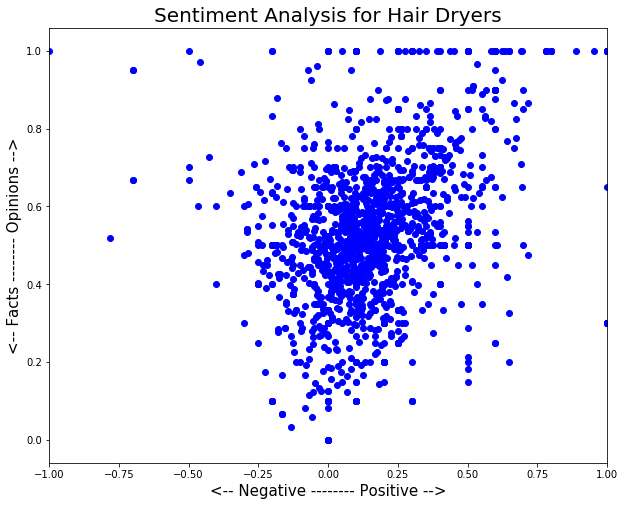

In [47]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]
i = -1
for j in data_clean.reviews:
    i = i + 1
    x = data_clean.polarity.loc[i]
    y = data_clean.subjectivity.loc[i]
    plt.scatter(x, y, color='blue')
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis for Hair Dryers', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [48]:
print(data_clean.polarity.loc[3])

0.0


In [49]:
polarity_transcript = []
i = -1
c = 0
n = 1
for j in data_clean.reviews:
    i= i + 1
    c = c + TextBlob(j).sentiment.polarity
    if i < 1614:
        if micro['review_date'][i] == micro['review_date'][i+1]:
            n = n + 1
        else: 
            polarity_transcript.append(c/n)
            c = 0
            n = 1
    else: 
        polarity_transcript.append(c/n)
        c = 0
        n = 1
polarity_transcript

[0.26789249639249635,
 0.11050054112554113,
 0.19845054945054943,
 0.2980729166666667,
 0.1273395316804408,
 0.04304929792429793,
 0.14242935363247863,
 0.1369655753968254,
 0.17308044077134987,
 0.18189791689791693,
 0.23636111111111113,
 0.17983225108225107,
 0.19221891226057894,
 0.17525219379386042,
 0.010227040940809059,
 0.06668120507964259,
 0.06622589087866866,
 0.09379665445665444,
 0.1342481273996341,
 0.06597098567584679,
 0.2970292795972144,
 0.24606558061821224,
 0.1305787037037037,
 0.14394444444444446,
 0.14880317460317458,
 0.08042704897615613,
 0.091191829004329,
 0.1758060515873016,
 0.21570048305739095,
 0.21802765376984126,
 0.08986271808999081,
 0.05455318491032777,
 0.10700077700077701,
 0.3353373015873016,
 0.18251122334455672,
 0.09416694365305477,
 0.13107142857142856,
 0.04852064081477327,
 0.04952083333333333,
 0.18488380861070502,
 0.2669253923160173,
 0.16764425033655803,
 0.128054530346197,
 0.04057692307692308,
 -0.019187831665473946,
 0.06363846801346804

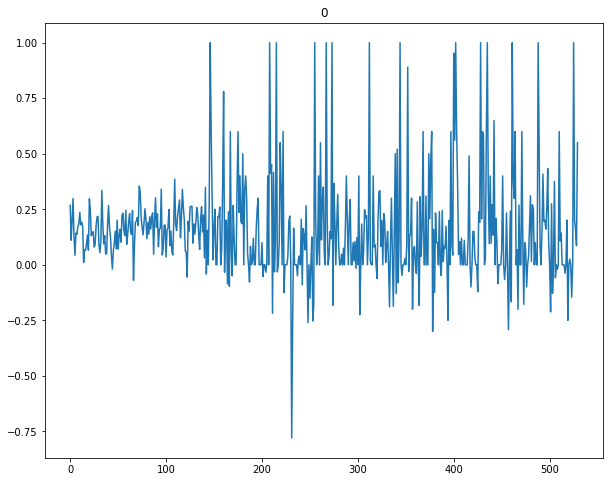

In [50]:
plt.plot(polarity_transcript)
plt.title(data_clean['reviews'].index[0])
plt.show()

In [51]:
from gensim import matutils, models
import scipy.sparse
data = data_dtm
tdm = data.transpose()
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [52]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [53]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=40)
lda.print_topics()

[(0,
  '0.025*"drying" + 0.025*"afr" + 0.025*"air" + 0.013*"quier" + 0.013*"far" + 0.013*"replacement" + 0.013*"thats" + 0.013*"makes" + 0.013*"died" + 0.013*"quick"'),
 (1,
  '0.114*"nice" + 0.110*"size" + 0.107*"design" + 0.107*"color" + 0.106*"ordered" + 0.104*"beautiful" + 0.104*"whi" + 0.000*"ni" + 0.000*"li" + 0.000*"fry"'),
 (2,
  '0.013*"blow" + 0.012*"works" + 0.010*"dry" + 0.008*"heat" + 0.007*"hot" + 0.006*"price" + 0.006*"cord" + 0.006*"little" + 0.006*"years" + 0.006*"bought"')]

In [57]:
from textblob import TextBlob
for j in data_clean.reviews:
    te = TextBlob(j)
    print(te.tags) 


**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt/english.pickle

  Searched in:
    - 'C:\\Users\\zacka/nltk_data'
    - 'C:\\Users\\zacka\\Anaconda3\\nltk_data'
    - 'C:\\Users\\zacka\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\zacka\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\zacka\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.
